In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Bayesian inference

In traditional, frequentist approach, we are interested in the probability of an event under known conditions. We may write it in the form $P(x\mid\theta)$, what means: probability of an event $x$ under the condition $\theta$. For most cases $\theta$ is a parameter or set of parameters of an probabilistic distribution, for example for normal distribution with mean $\mu$ and variance $\sigma^2$ we have:
$$ P(x \mid \theta)  \sim P(x \mid \mu,\,\sigma^{2}) \sim \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}.$$

The Bayesian approach is an inverse one. Being given some observed events, we estimate the probability of parameters. It bases on the classical Bayes formula:

$$ P(\theta \mid x)   = \dfrac{ P(x \mid \theta) P(\theta) }{P(x)}.$$

Traditionally, we use the names:
- $ P(\theta \mid x) $   - *posterior probability*,
- $ P(x \mid \theta) $   - *likelihood*,
- $ P(\theta) $   - *prior probability*,
- $ P( x) $    - *evidence probability*.

The evidence probability does not depend on $\theta$ and provides only scaling factor for the posterior probability. It can be then ommited in most of the applications.

One of the main weaknesses of the Bayesian inference is it's dependence on prior knowledge. In order to compute the likelihood, we need to know, up to the parameters, the probability distribution of the data. It also requires an initial guess on the parameter distribution, in order to evaluate prior.

The Bayesian inference is often performed iteratively, that means that resulting posterior after every step of the iteration becomes the prior for the next step.

# Radioactive decay with noisy background 

In the following exercises we will deal with real-live problem of determining the intensity of source decay in the presence of background noise. We assume that the number of registered counts follow the Poisson distributions with means respectively $\lambda_{s}$ and $\lambda_{b}$ for signal and background.

In [2]:
def get_background(lam_b = 30, s=1):
    return np.random.poisson(lam=lam_b, size = s)

def get_background_signal(lam_b = 30, lam_s = 13, s = 1):
    return np.random.poisson(lam=lam_b+lam_s, size = s)

# Ex 1.
1. Implement likelihood function for poisson distribution.
2. Assuming flat prior for background $\lambda$ factor on [0,100] interval, calculate and plot posterior distributions for background $\lambda$ after including 1-9 single background observations.

In [3]:
#1)
def likelihood(lam, x):
    #here goes your code

#test:
#x = [30,32,34]
#likelihood(30, x)
#0.00025301172977209218

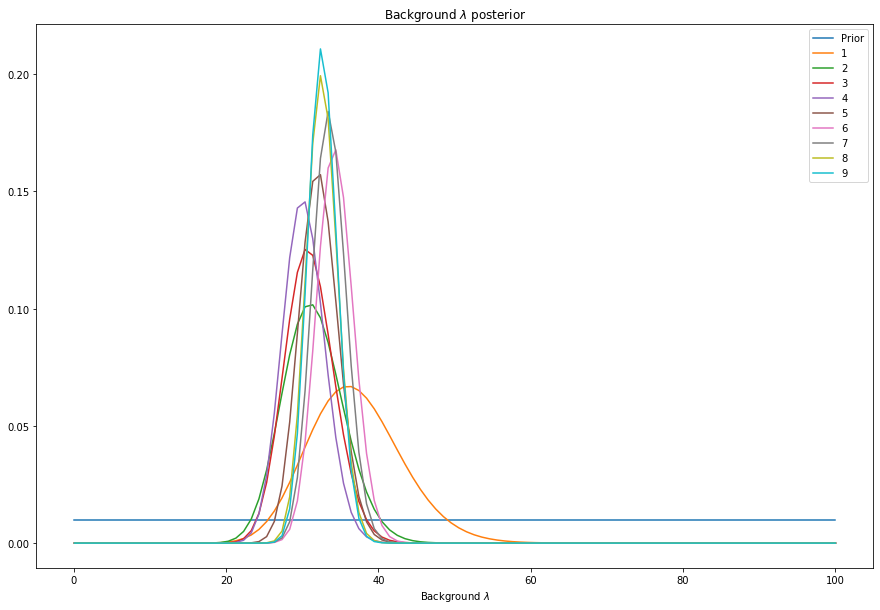

In [4]:
#2)
prior_bck = np.ones(100)/100
prior_sg = np.ones(100)/100
#here goes your code


for i in range(9):
    data = get_background()
    #here goes your code
    


# Ex 2.
1. Taking flat prior for signal $\lambda$ parameter on [0,100] interval and posterior from Ex 1 for background, calculate and plot 2D posterior distribution for signal and background $\lambda$ after including 1-9 single background-signal observations. Find lambdas which give the highest posterior.

In [5]:
#here goes your code



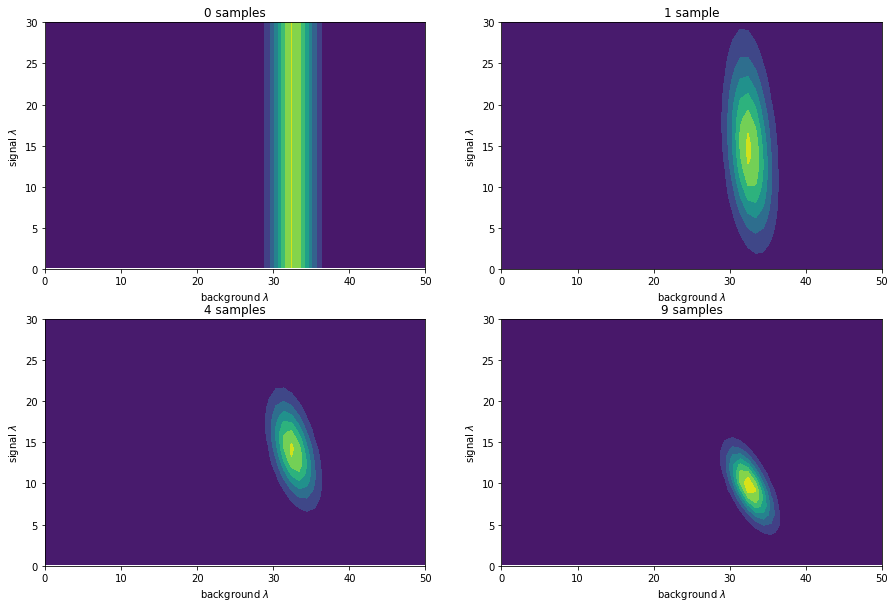

Optimal lambdas:


(10, 32)

In [6]:
#here goes your code

#hint: plt.contourf(), np.unravel_index(posteriors[-1].argmax(), posteriors[-1].shape)

# Loglikelihood

Calculating likelihood is troublesome for large datasets due to low values of the probability and finite computer precision. Therefore, it is common to use the log-likelihood and log-posterior functions instead, which are equal to logarithms of the original ones. It helps us to avoid multiplying low numbers, which often leads to "zero" likelihood, as the logarithm of a product is a sum of logarithms.  

What is important, as logarithm is a monotonic function, the maximum of a function and log-function coincide.


In [7]:
#Try it:
x = [23] * 100000
likelihood(x, 30)

0.0

## Ex 3
a) Implement the log-likelihood function for poisson distribution.   
b) Redo Ex 2 using log-posterior (single iteration, 9 samples).   
c) Plot results and verify that the maximum Log-posterior estimation gives similar results as posterior estimation.

In [8]:
#a)
#here goes your code

#test:
#x = [23] * 100000
#loglikelihood(x, 30)
# -359340.98709556682

In [9]:
#b)
data = get_background_signal(s = 9)

#here goes your code


# logposterior is not loglikelihood * logprior !

/home/kacper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


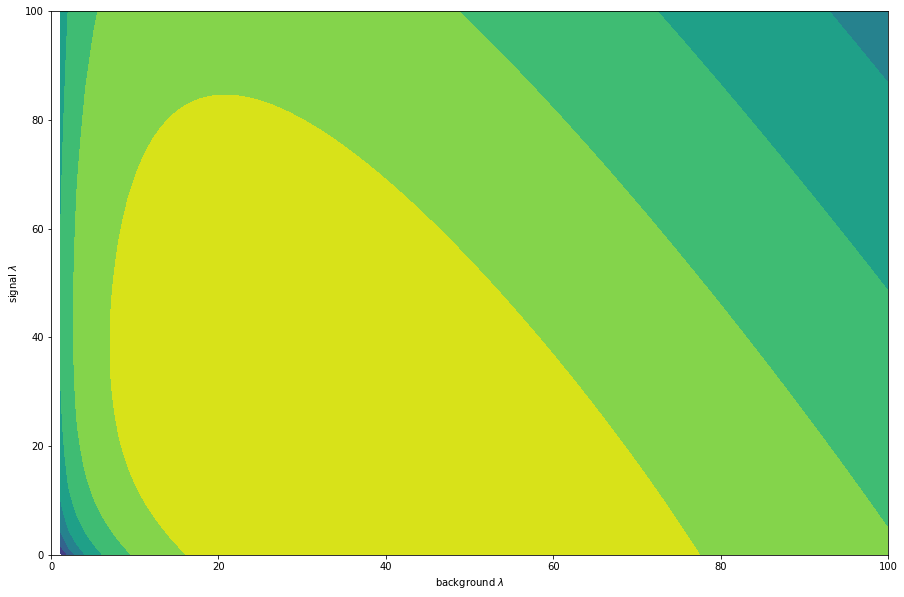

Optimal lambdas:


(13, 32)

In [10]:
#c)
#here goes your code
#hint: plt.contourf(), np.unravel_index(logposterior.argmax(), logposteriors.shape)

# Bayes factor, p-value, $\beta$

While estimations and plots above can provide with us with suggestions about the distribution, we also need some numerical evaluation of conclusions which may be taken. In the following exercise we will study few of them.

## Ex 4.
In all below we assume Poisson distribution. 

### Bayes factor
Being given two hypothesies, $H_{0}$ (null hypothesis, default one)  and $H_{1}$ (alternative hypothesis, the one which is being verified), we define the Bayes factor as:

$$ K = \dfrac{ P(x \mid H_{1}) }{ P(x \mid H_{0}) } $$

High values of $K$ support the alternative hypothesis, low values reject it. One of the interpretation is as follows:

| K        | Strength of evidence|
| :-------------:|:-------------:|
| < $\sqrt{10}$     | Negative      |
| $\sqrt{10}$  - 10 | Substantial     |
| 10  - 100 | Strong     |
| >100 | Decisive     |

a) For number of counts from 10 to 50 calculate Bayes factor for $H_{0}: \mu = 30$ (just background) nad $H_{1}: \mu = 43$ (background + signal). Do the same for double counts (two identical results).   

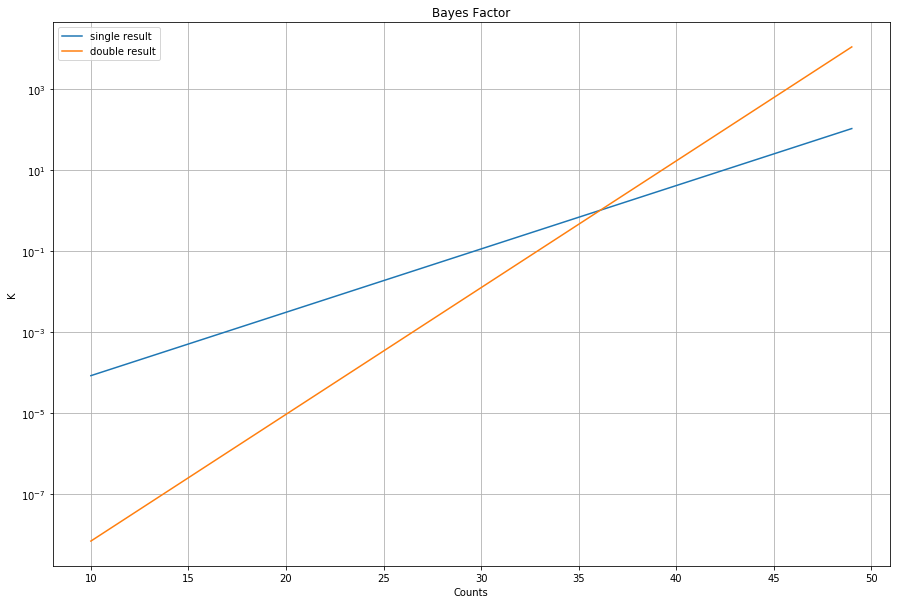

In [11]:
#here goes your code


#hint: scipy.stats.poisson.pmf()

### P-value

For a given observation and null hypothesis $H_{0}$, *P-value* is defined as a probability of observation at least as extreme as observed one under the condition, that $H_{0}$. Depending on the context and shape of the distribution, we may use:
- left tail p-value: $P(x < x_{obs} \mid H_{0})$,
- right tail p-value: $P(x > x_{obs} \mid H_{0})$,
- two sided p-value: $2 \min \{ P(x < x_{obs} \mid H_{0}), P(x > x_{obs} \mid H_{0})\} $.

Low p-value is an indicator, that $H_{0}$ may be false. It is widely accepted, that p-value < 0.05 or < 0.01 is a sufficient to reject zero hypothesis. In certain fields, such as particle physics, much lower p-values are required.

b) For count numbers from 10 to 50 calculate right-tailed p-value for $H_{0}: \mu = 30$.

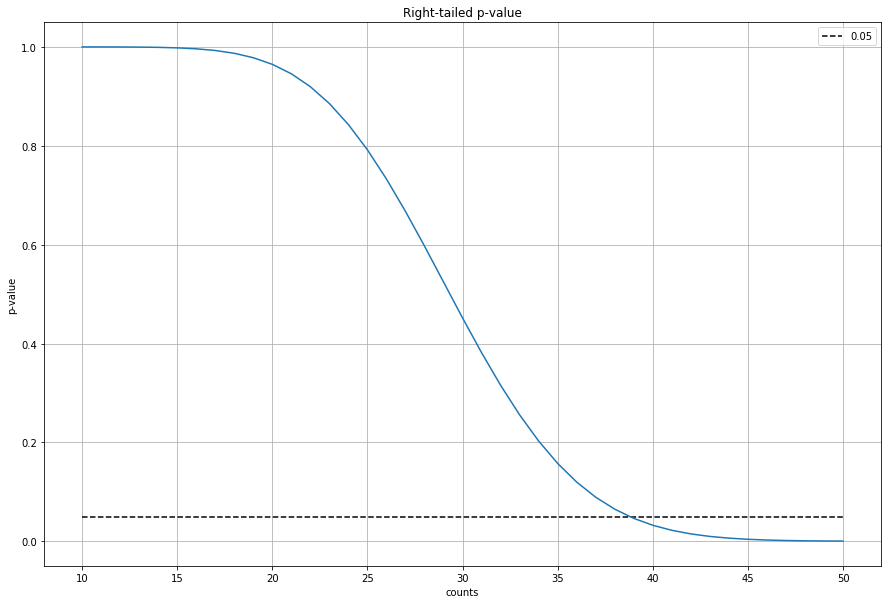

In [12]:
#here goes your code

#hint: scipy.stats.poisson.cdf()

Designing a hypothesis test we face a tradeoff between being vulnerable to two possible kinds of error:
1. Type I error: Reject null hypothesis, which was actually true.   
2. Type II error: Accept null hypothesis, which was actually false.

Probability of committing each kind of error is strictly connected with the threshold p-value, which enables us to reject the null hypothesis. This threshold value is often called **significance level**.

Low significance level reduces the probability of committing type I  error, makes it harder to reject false null hypothesis. High significance lowers the criteria for rejecting, which may result in a big number of **false positives**.

The probability of **not** committing type II error is denoted $\beta$ and called **power of the test**.

c) For true lambdas from 31 to 60 and single observation, calculate a power of the test for $H_{0}: \mu = 30$ and significance level 0.05.



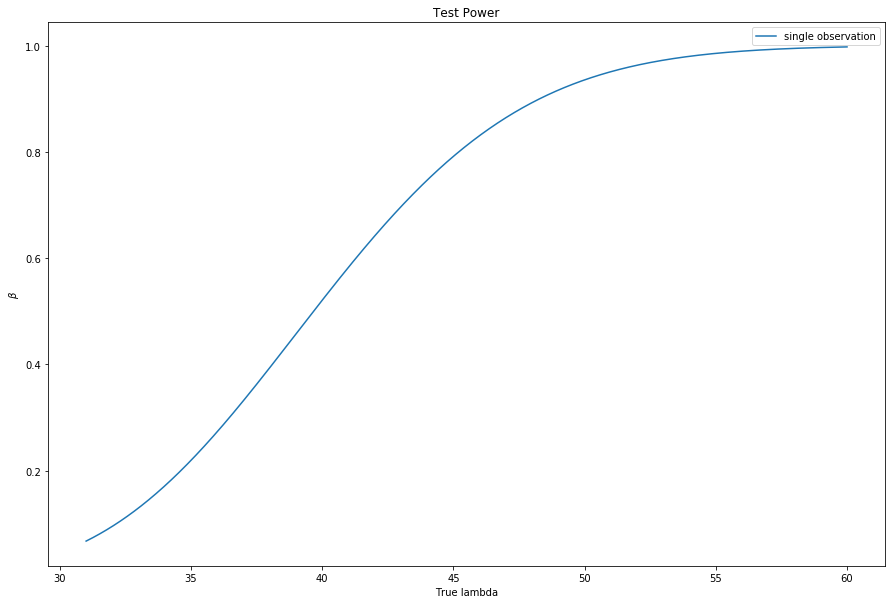

In [13]:
#here goes your code

#hint: scipy.stats.poisson.isf(), scipy.stats.poisson.cdf()